In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
df_customer=pd.read_csv('data/olist_customers_dataset.csv')
df_customer=df_customer.drop(['customer_unique_id'],axis=1)
df_customer.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [3]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [4]:
# find more insight 
print('Jumlah Kota:',df_customer.customer_city.nunique())
print('Jumlah State:',df_customer.customer_state.nunique())
print(str.format('per state {:.0f}',df_customer.groupby(by='customer_state').customer_city.value_counts().mean()))

Jumlah Kota: 4119
Jumlah State: 27
per state 23


Text(0, 0.5, 'Costumer')

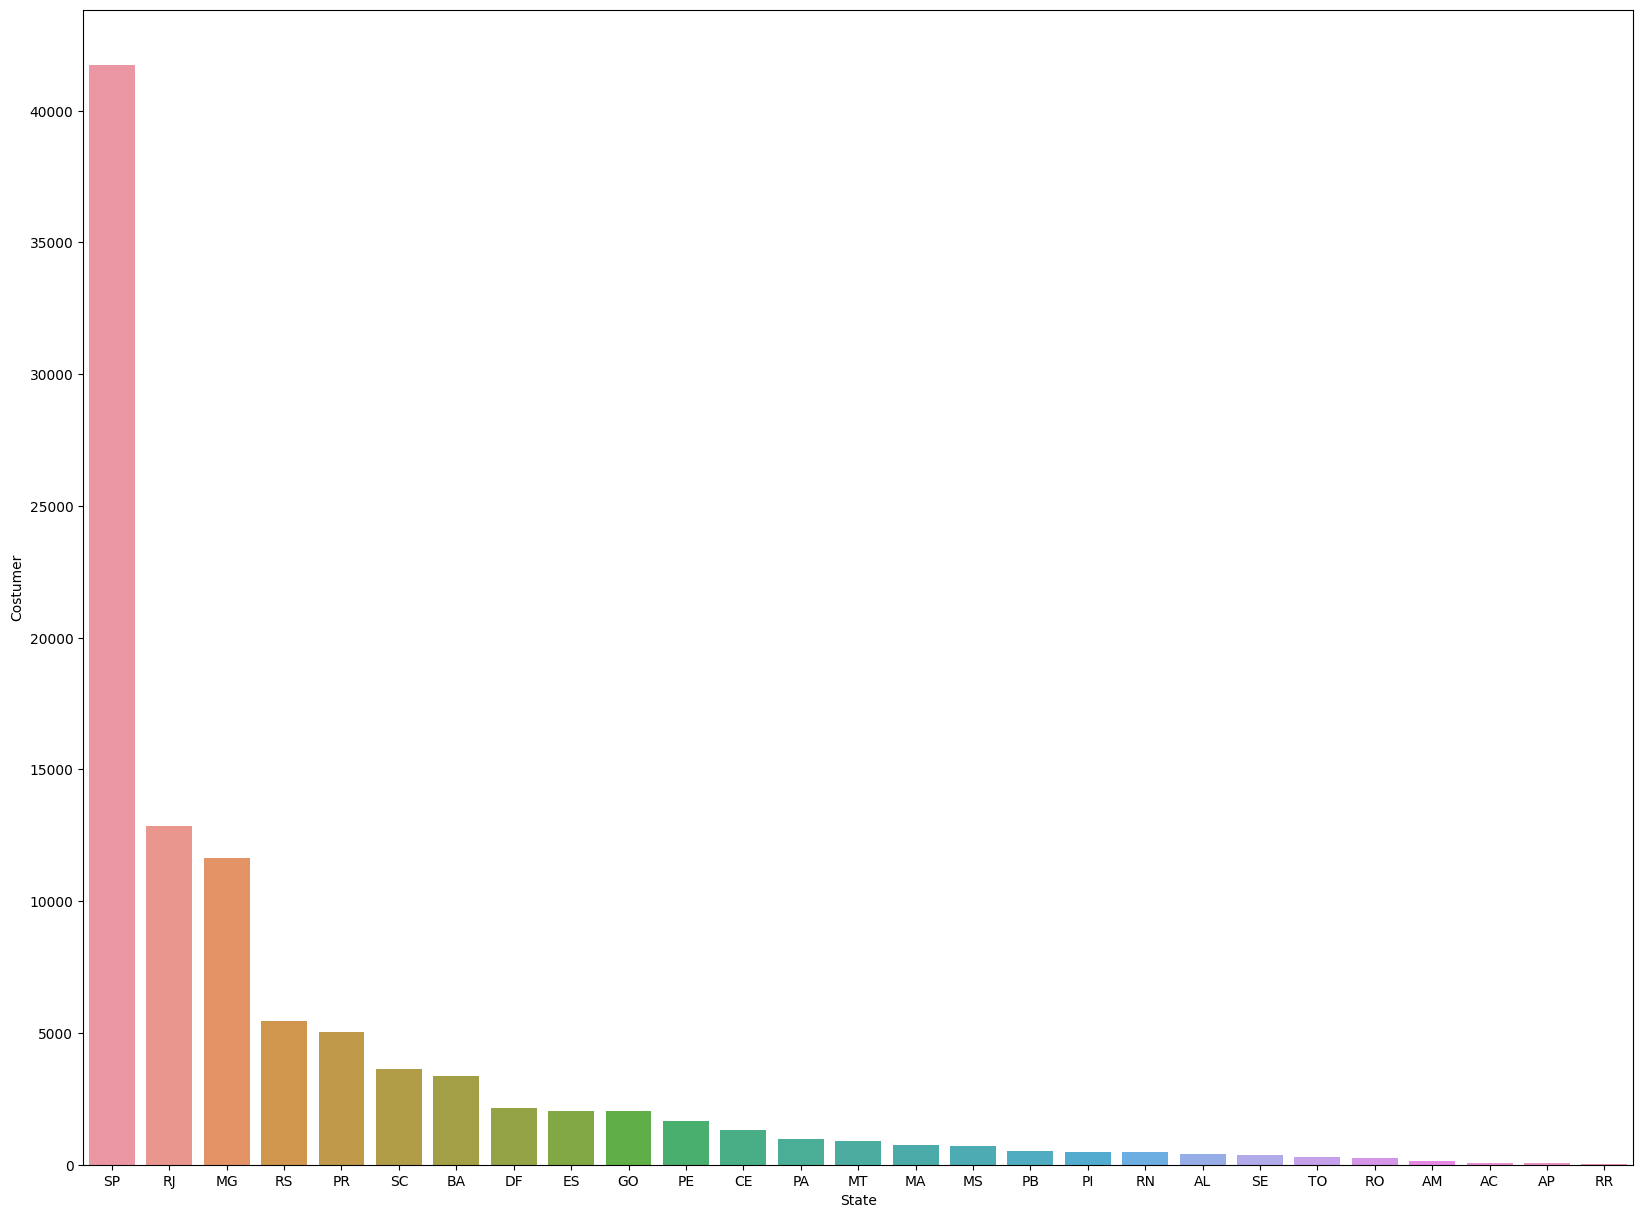

In [5]:
plt.figure(figsize=(20,15))
sns.countplot(data=df_customer,x='customer_state',order=df_customer.customer_state.value_counts().index)
plt.xlabel('State')
plt.ylabel('Costumer')

In [6]:
# hitung jumlah konsumen per state
state_con=df_customer.groupby(df_customer.customer_state,as_index=False).customer_id.count()
state_con.columns=['state','count_customer']
state_con.sort_values('count_customer',ascending=False,inplace=True)
state_con.head()

,state,count_customer
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


Jenis Payment


In [7]:
df_payment=pd.read_csv('data/olist_order_payments_dataset.csv')
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


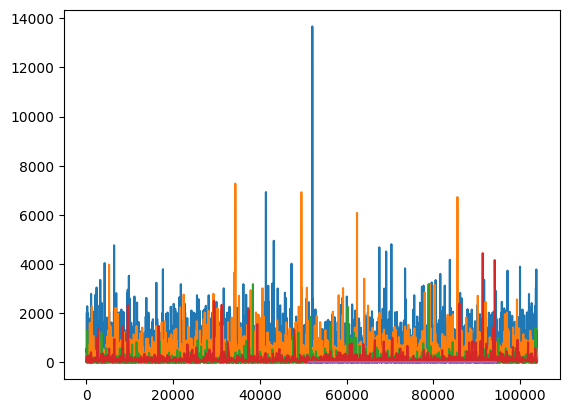

In [88]:
for key in df_payment.payment_type.unique():
    formula=df_payment[df_payment['payment_type']==key].payment_value
    plt.plot(formula)
    


In [8]:
df_payment.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [9]:
# composisi jenis pembayaran
fig=px.pie(df_payment,names=df_payment.payment_type.unique(),values=df_payment.payment_type.value_counts())
fig.show()

In [55]:
# count payment type 
payment_type_count=df_payment.groupby(df_payment.payment_type,as_index=False).order_id.count()
payment_type_count.columns=['payment_type','count']
payment_type_count.sort_values('count',ascending=False,inplace=True)

state_con

,payment_type,count
1,credit_card,76795
0,boleto,19784
4,voucher,5775
2,debit_card,1529
3,not_defined,3


Text(0.5, 1.0, 'Count For installments')

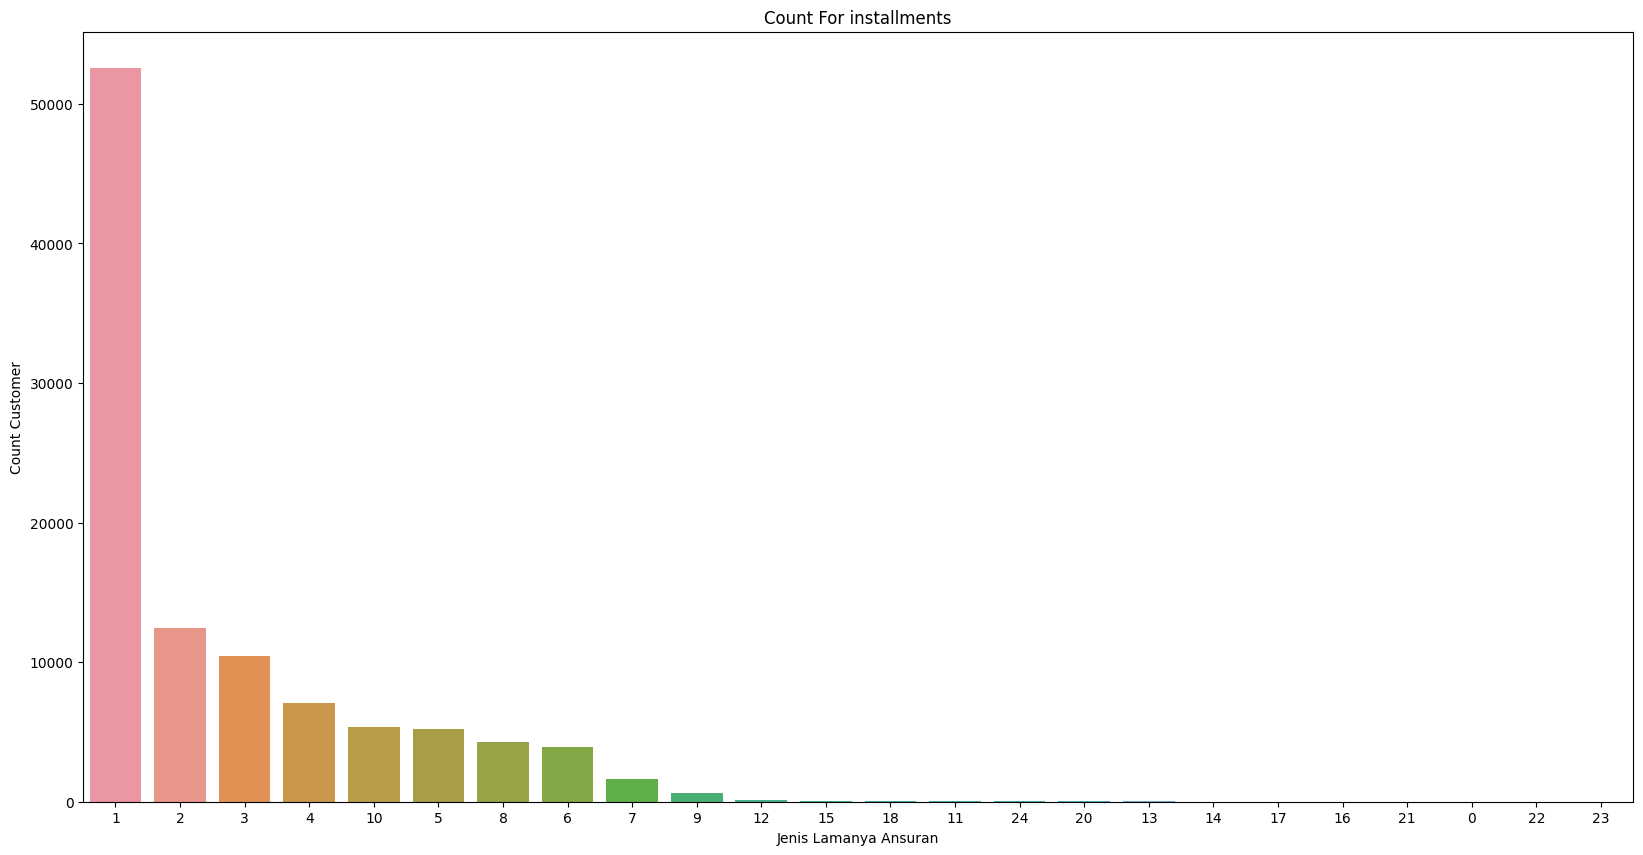

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df_payment,x='payment_installments',order=df_payment.payment_installments.value_counts().index)
plt.xlabel('Jenis Lamanya Ansuran')
plt.ylabel('Count Customer')
plt.title('Count For installments')

In [12]:
# count payment type 
state_con=df_payment.groupby(df_payment.payment_installments,as_index=False).order_id.count()
state_con.columns=['payment_installments','count']
state_con.sort_values('count',ascending=False,inplace=True)
state_con.head()

,payment_installments,count
1,1,52546
2,2,12413
3,3,10461
4,4,7098
10,10,5328


# check order item


In [13]:
df_items=pd.read_csv('data/olist_order_items_dataset.csv')
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
df_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21])

In [15]:
# count payment type 
product_con=df_items.groupby(df_items.product_id,as_index=False).order_id.count()
product_con.columns=['product','count']
product_con.sort_values('count',ascending=False,inplace=True)
product_con.head()

,product,count
22112,aca2eb7d00ea1a7b8ebd4e68314663af,527
19742,99a4788cb24856965c36a24e339b6058,488
8613,422879e10f46682990de24d770e7f83d,484
7364,389d119b48cf3043d311335e499d9c6b,392
7079,368c6c730842d78016ad823897a372db,388


/tmp/ipykernel_12825/210679341.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='price', ylabel='Density'>

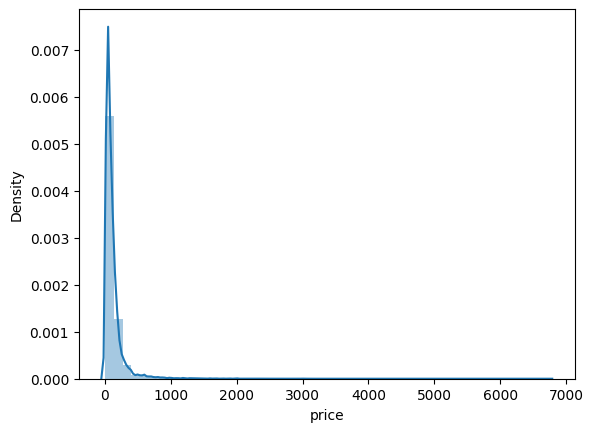

In [16]:
sns.distplot(df_items.price)

/tmp/ipykernel_12825/1878091466.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='freight_value', ylabel='Density'>

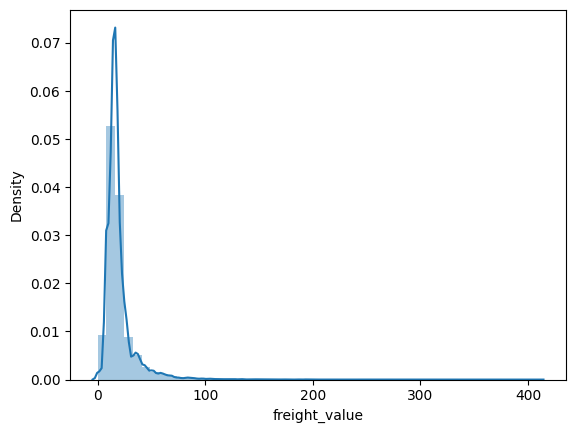

In [17]:
sns.distplot(df_items.freight_value)

review pada pelanggan

In [18]:
df_reviews=pd.read_csv('data/olist_order_reviews_dataset.csv')
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<AxesSubplot: xlabel='review_score', ylabel='count'>

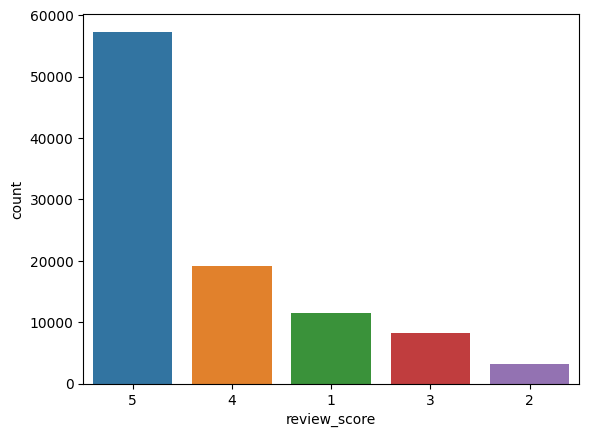

In [19]:
sns.countplot(df_reviews,x='review_score',order=df_reviews.review_score.value_counts().index)

In [20]:
review_score=df_reviews.groupby('review_score',as_index=False).review_id.count()
review_score.sort_values('review_id',ascending=False,inplace=True)
review_score


,review_score,review_id
4,5,57328
3,4,19142
0,1,11424
2,3,8179
1,2,3151


Pensebaran penjual

In [21]:
df_seller=pd.read_csv('data/olist_sellers_dataset.csv')
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Text(0.5, 1.0, 'Count Seller')

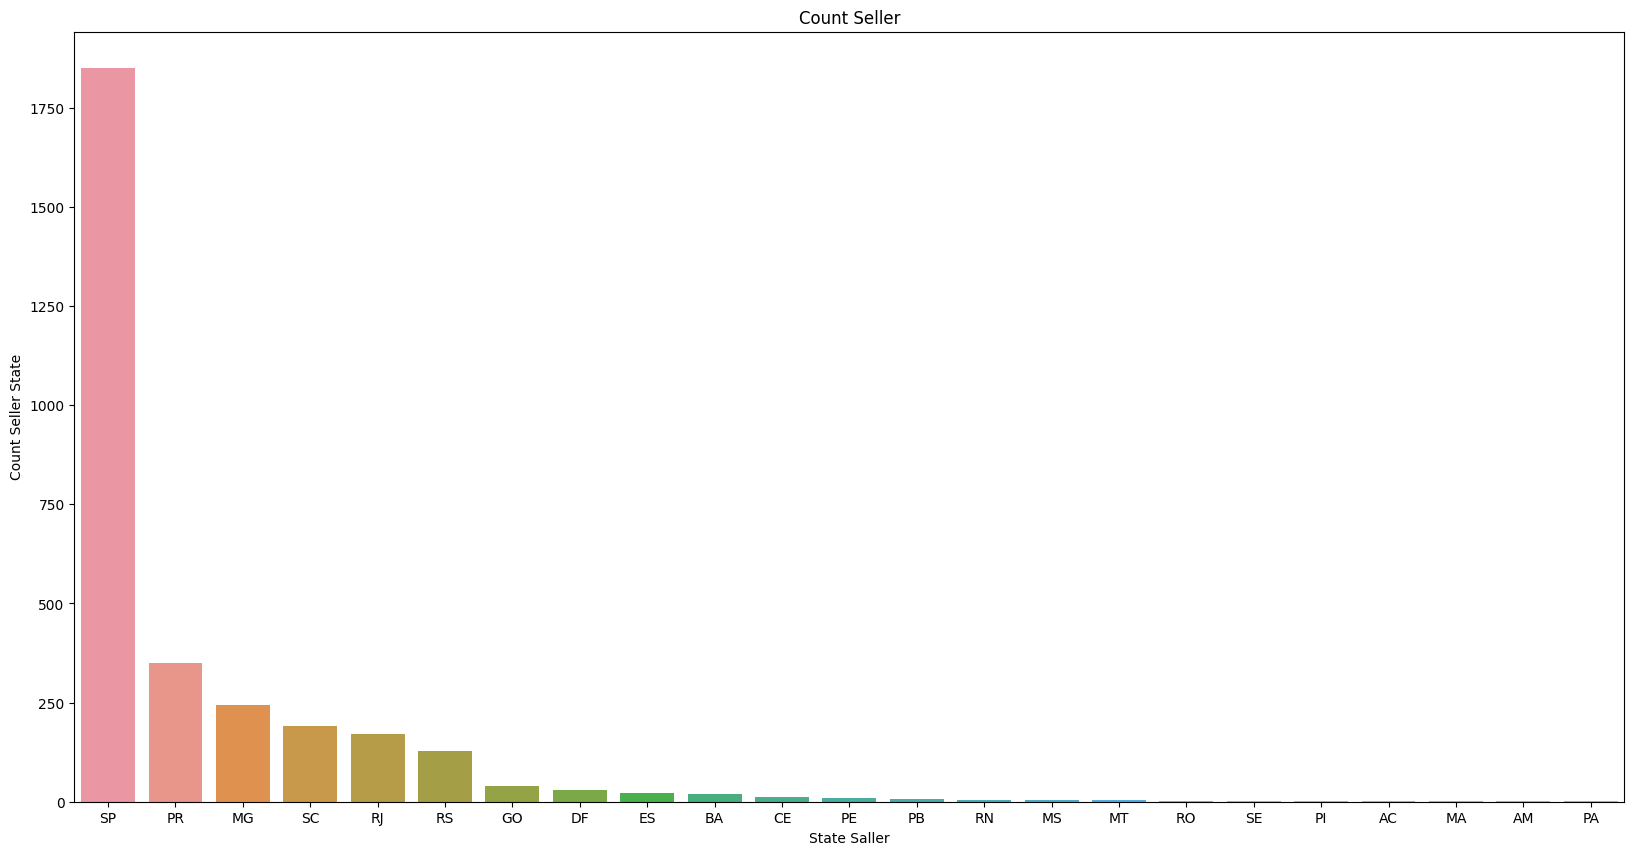

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df_seller,x='seller_state',order=df_seller.seller_state.value_counts().index)
plt.xlabel('State Saller')
plt.ylabel('Count Seller State')
plt.title('Count Seller')

In [23]:
# hitung banyak nya more insgiht
seller_con=df_seller.groupby('seller_state',as_index=False).seller_id.count()
seller_con.columns=['state','count_seller']
seller_con.sort_values('count_seller',ascending=False,inplace=True)
seller_con.head()

,state,count_seller
22,SP,1849
15,PR,349
8,MG,244
20,SC,190
16,RJ,171


In [26]:
# composisi jenis pembayaran
fig=px.pie(seller_con,names=seller_con.state.unique(),values=seller_con.count_seller)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=30, r=50, t=50, b=50),
    paper_bgcolor="LightSteelBlue",title="State For Saler",
)
fig.show()

In [ ]:
df_product=pd.read_csv('data/olist_products_dataset.csv')
df_translate=pd.read_csv('data/product_category_name_translation.csv')
df_product.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [ ]:
df_translate.product_category_name_english.unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [89]:
df_order=pd.read_csv("data/olist_orders_dataset.csv")
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [113]:
data_order_status=df_order.groupby('order_status',as_index=False).order_id.count()
data_order_status.columns=['status','count_status']
data_order_status.sort_values('count_status',ascending=False,inplace=True)
data_order_status

,status,count_status
3,delivered,96478
6,shipped,1107
1,canceled,625
7,unavailable,609
4,invoiced,314
5,processing,301
2,created,5
0,approved,2


In [139]:
# composisi jenis pembayaran
fig=px.pie(data_order_status,names=data_order_status.status.unique(),values=data_order_status.count_status)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=100, r=150),
    paper_bgcolor="LightSteelBlue",title="State For Saler",
)
fig.show()

In [157]:
def persen_des(data_number):
    persen=(np.array(data_number)/sum(data_number))*100
    combine=zip(data_unique,persen)
    for (key,value)in combine: 
        
        print(f'{value}')

In [153]:
data_order_status.count_status.values

array([96478,  1107,   625,   609,   314,   301,     5,     2])

In [159]:
# data_order_status=df_order.groupby('order_status',as_index=False).order_id.count()
# data_order_status.columns=['status','count_status']
# data_order_status.sort_values('count_status',ascending=False,inplace=True)
# data_order_status
persen_des(data_number=data_order_status.count_status.values)

TypeError: persen_des() missing 1 required positional argument: 'data_uniqe'

In [140]:
df_full=df_order.merge(df_customer,on='customer_id')
df_full

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,28685,japuiba,RJ
